# Neural Network

CLASSIFICATION

IMPORTING THE MODULES

In [1]:

import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

DEFINING FEW GOOD FUNCTIONS

In [19]:
'''convers the vector into matrix of binary used for the multiclass classification'''
def vector_to_matrix_of_zeros_and_ones(vect, classes):
    m=vect.size
    Y=np.zeros((m,classes))
    flag=0
    for i in vect:
        Y[flag][i-1]=1
        flag+=1
    
    return Y 



'''returns the sigmoid'''
def sigmoid (input):
    return 1/(1+np.exp(-input))


'''inputs the data from the user and returns the X and y values'''

def input_data(s):
    print("uploading a  csv file that is appropriate for logistc regression.......")

    X=pd.read_csv(s,header=None)   #load the training data

    # n=int(input("enter the number of features....."))

    X=X.to_numpy()    #converting to numpy
    i=len(X[0])       #finding the number of features
    m=X[:,0].size   
    y=X[:,0].reshape((m,1))
    X=np.delete(X,0,axis=1) 
    n=i                     #n is number of features
#     mean=np.mean(X,axis=1).reshape((m,1))
#     std=np.std(X,axis=1).reshape((m,1))
#     X=(X-mean)/std
    u=np.ones((m,1))            #vector of ones then p.
    # mean=np.mean(X,axis=1).reshape((m,1))
    # std=np.std(X,axis=1).reshape((m,1))
    X=X/255
    X=np.concatenate((u,X),axis=1)
#     print(X)
    return X,y



'''randomly assigns the value of the parameters for the given size of the matrix '''
def parameters(L_next,L_current):
    #dimension = L_next*L_current                            
    epsilon = 0.12
    theta= - epsilon + np.random.rand(L_next, L_current) * 2 * epsilon
    return theta
    
'''gives the gradinet of the sigmoid'''    
def siggrad(z):
    g=np.zeros((z.shape))
    g=sigmoid(z)*(1-sigmoid(z))
    return g

"""returns the cost of the clssification problem"""
    
def cost(theta1,theta2,X_train,Y,lamba=0):         #forward propagation
    m,n=X_train.shape
    u=np.ones((m,1))
#     X_train=np.concatenate((u,X_train),axis=1)
    a1 = X_train    #m*n
    z2 = a1@(theta1.T)  #  m,n  @  n,hiddensize
    a2 = sigmoid(z2) # m x hidden_layer
    a2 = np.concatenate((u,a2),axis=1)   
    z3 = a2@(theta2.T)    
    a3 = sigmoid(z3)
    h_x = a3
    J=J = (1/m)*(np.sum((-Y*np.log(h_x))-((1-Y)*np.log(1-h_x))))+(lamba/2*m)*((np.sum(theta1**2)+np.sum(theta2**2)))
    return J,h_x
    
#back propagation
'''used to find the gradient of the parameters'''
def back_prop(theta1,theta2,X,Y):
    theta1_grad = np.zeros(theta1.shape)
    theta2_grad = np.zeros(theta2.shape)
    A1 = X       # m,785
    Z2 = A1@theta1.T      # mx hidden_layer_size == m x 784
    A2 = sigmoid(Z2)      #  m x hidden_layer_size == mx 784
    m,n=X.shape
    u=np.ones((m,1))
    A2 = np.concatenate((u,A2),axis=1)
    Z3 = A2@theta2.T         #m x num_labels == m x 26
    A3 = sigmoid(Z3) 
    h_x = A3                  #m,26
    DELTA3 = A3 - Y
    m,n=(DELTA3@theta2).shape
    DELTA2 = (DELTA3@theta2)*(np.concatenate((np.ones((m,1)),siggrad(Z2)),axis=1))    #m,525    *
    DELTA2 = DELTA2[:,1:]
    theta1_grad = (1/m) * (DELTA2.T @ A1)
    theta2_grad = (1/m) * (DELTA3.T @ A2)
    return theta1_grad,theta2_grad


'''here the loops run in order to optimise the value of theta'''
def grad_descent(theta1,theta2,X,Y):
    alpha=0.01
    for i in range(200):
        theta1_grad,theta2_grad=back_prop(theta1,theta2,X,Y)
        theta2=theta2-theta2_grad*alpha
        theta1=theta1-theta1_grad*alpha
        J,h_x=cost(theta1,theta2,X_train,Y)
        plt.scatter(i,J)
        print(J)


    return theta1,theta2,h_x


'''this converts the sigmoid matrix outputted from the prediction and convers into viewable form of the vector'''
def convert_matrix_into_VECTOR(h_x):
    m,k = h_x.shape
    h = np.zeros((m,1))
    for i in range(m):
        a_sliced = h_x[i]
        index = np.where(a_sliced == np.amax(a_sliced))[0]
        h[i] = index+1
            
    return h



'''lastly this fucntion is used to define the accuracy of the prediction'''
def accuracy(h,y):
    m=y.size
    count=0
    for i in range(m):
        if h[i]==y[i]:
            count+=1
    accu=(count/m)*100
    return accu


def predict(theta1,theta2,X):
#     X=X/255
    m,n=X.shape
    u=np.ones((m,1))
    a1 = X    #m*n
    z2 = a1@(theta1.T)  #  m,n  @  n,hiddensize
    a2 = sigmoid(z2) # m x hidden_layer
    a2 = np.concatenate((u,a2),axis=1)   
    z3 = a2@(theta2.T)    
    a3 = sigmoid(z3)
    h_x = a3
    return convert_matrix_into_VECTOR(h_x)
    

inputting the data

In [3]:
X_train,y_train=input_data('emnist-letters-train.csv')

uploading a  csv file that is appropriate for logistc regression.......


calling the functions to initialise theta and setting the units of the hidden layer


In [4]:
Y=vector_to_matrix_of_zeros_and_ones(y_train,26)
L_hidden=524
classes=26
m_train,n_train=X_train.shape
theta1=parameters(L_hidden,n_train)
theta2=parameters(classes,L_hidden+1)

In [5]:
theta1.shape
theta2.shape

(26, 525)

12.46809926715461
8.971152272505515
7.2886310955957025
6.360977455984981
5.792458638428097
5.417300334802158
5.156276903225883
4.9673615632421155
4.826412388696878
4.7186788146395395
4.634697028615477
4.568150314785706
4.514682920172366
4.4712082716887105
4.435487984753371
4.405866246686104
4.381096951788803
4.360228129882764
4.342522835519
4.327403855884353
4.31441434401391
4.303189322412007
4.2934347457765165
4.284911909035283
4.2774256931219865
4.270815604508067
4.264948874404041
4.259715094170243
4.255022008831232
4.25079219231617
4.246960400171907
4.24347144725017
4.240278495424709
4.237341663930405
4.234626895303081
4.232105025131215
4.229751015308827
4.227543319197791
4.22546335378137
4.223495059034379
4.221624528727866
4.2198397000033365
4.21813009150154
4.216486581766251
4.214901221181364
4.213367071927954
4.211878071433432
4.210428915579655
4.209014958580673
4.207632126964032
4.206276845517281
4.204945973411751
4.203636749004057
4.202346742053982
4.201073812294793
4.199816073

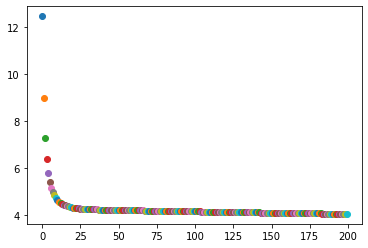

In [6]:
theta1,theta2,h_x=grad_descent(theta1,theta2,X_train,Y)

In [7]:
y_pred=convert_matrix_into_VECTOR(h_x)

In [8]:
y_pred


array([[18.],
       [ 7.],
       [16.],
       ...,
       [ 9.],
       [10.],
       [12.]])

In [9]:
accuracy(y_train,y_pred)

20.31081081081081

In [18]:
X_test,y_test=input_data('emnist-letters-test.csv')

uploading a  csv file that is appropriate for logistc regression.......


In [20]:
y_test_pred=predict(theta1,theta2,X_test)

In [21]:
np.min(y_test_pred)

1.0

In [22]:
X_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
accuracy(y_test_pred,y_test)

22.006756756756758